### Part I: Importing the Libraries

In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline,make_pipeline
import scipy.stats as stats
import wandb
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier




In [172]:
# wandb.login()
# #b5d71b1a014b5ecd1a6366461c4b904eb968cf22


In [173]:
# wandb.init(project="Mental-Disorder-Classification",id="table")
df = pd.read_csv('/mnt/d/WSL/Mental-Disorder-Classification/Dataset-Mental-Disorders.csv')
# Log the DataFrame to wandb
# wandb.log({"table": wandb.Table(dataframe=df)})

df.head(5)

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


### Understanding the dataset

#### Shape of the dataset

In [174]:
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 120
Number of columns: 19


#### Finding NULL Values in the dataset

In [175]:
df.isnull().sum()

Patient Number         0
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64

##### Here the dataset does not have any null values

#### I have extracted the numeric data from string

In [176]:
df.drop('Patient Number', axis=1, inplace=True)
df['Sexual Activity'] = df['Sexual Activity'].str.extract('(\d)').astype(float)
df.rename(columns={'Sexual Activity': 'Sexual Activity (scale of 10)'}, inplace=True)

df['Concentration'] = df['Concentration'].str.extract('(\d+)').astype(float)
df.rename(columns={'Concentration': 'Concentration (scale of 10)'}, inplace=True)

df['Optimisim'] = df['Optimisim'].str.extract('(\d+)').astype(float)
df.rename(columns={'Optimisim': 'Optimisim (scale of 10)'}, inplace=True)



In [177]:
# wandb.init(project="Mental-Disorder-Classification",id="Updated_table")
# wandb.log({"updated_table": wandb.Table(dataframe=df)})

In [178]:
df.sample(5)

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity (scale of 10),Concentration (scale of 10),Optimisim (scale of 10),Expert Diagnose
105,Most-Often,Seldom,Usually,Most-Often,NO,YES,YES,YES,NO,NO,YES,NO,YES,YES,3.0,7.0,1.0,Depression
53,Seldom,Usually,Seldom,Most-Often,YES,NO,YES,YES,NO,YES,YES,YES,NO,NO,5.0,1.0,4.0,Bipolar Type-1
90,Most-Often,Seldom,Usually,Usually,NO,YES,NO,YES,NO,YES,YES,YES,NO,YES,4.0,4.0,3.0,Depression
38,Sometimes,Seldom,Usually,Sometimes,NO,NO,NO,YES,NO,NO,YES,NO,YES,NO,5.0,5.0,3.0,Normal
61,Usually,Sometimes,Usually,Most-Often,NO,YES,NO,NO,YES,NO,NO,YES,YES,YES,4.0,5.0,2.0,Depression


#### Plotting the datatypes

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

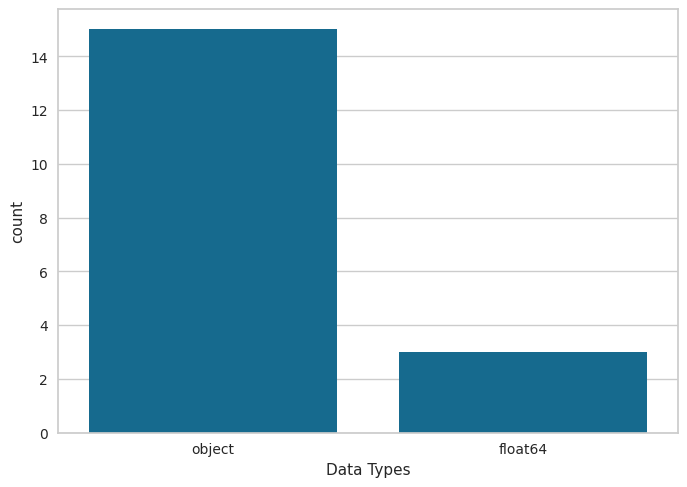

In [179]:
dtypes_df = pd.DataFrame(df.dtypes, columns=['Data Types'])

# Create a count plot
sns.countplot(x='Data Types', data=dtypes_df)
plt.show()

#### Statistical Interpretation

In [180]:
df.describe()

,Sexual Activity (scale of 10),Concentration (scale of 10),Optimisim (scale of 10)
count,120.000000,120.000000,120.000000
mean,4.741667,4.250000,4.466667
std,2.010459,1.797524,1.991298
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000
50%,5.000000,4.000000,4.000000
75%,6.000000,5.000000,6.000000
max,9.000000,8.000000,9.000000


#####   Sexual Activity (scale of 10): well we find that the median is 5 and (min,max) ranges from (1,9)

#####    Concentration (scale of 10) : well we find that the median is 4 and (min,max) ranges from (1,8)

#####    Optimisim (scale of 10) : well we find that the median is 4 and (min,max) ranges from (1,9)

### Explolatory Data Analysis

##### (A) Univariate analysis

Text(0.5, 1.0, 'Suicidal thoughts Distribution')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

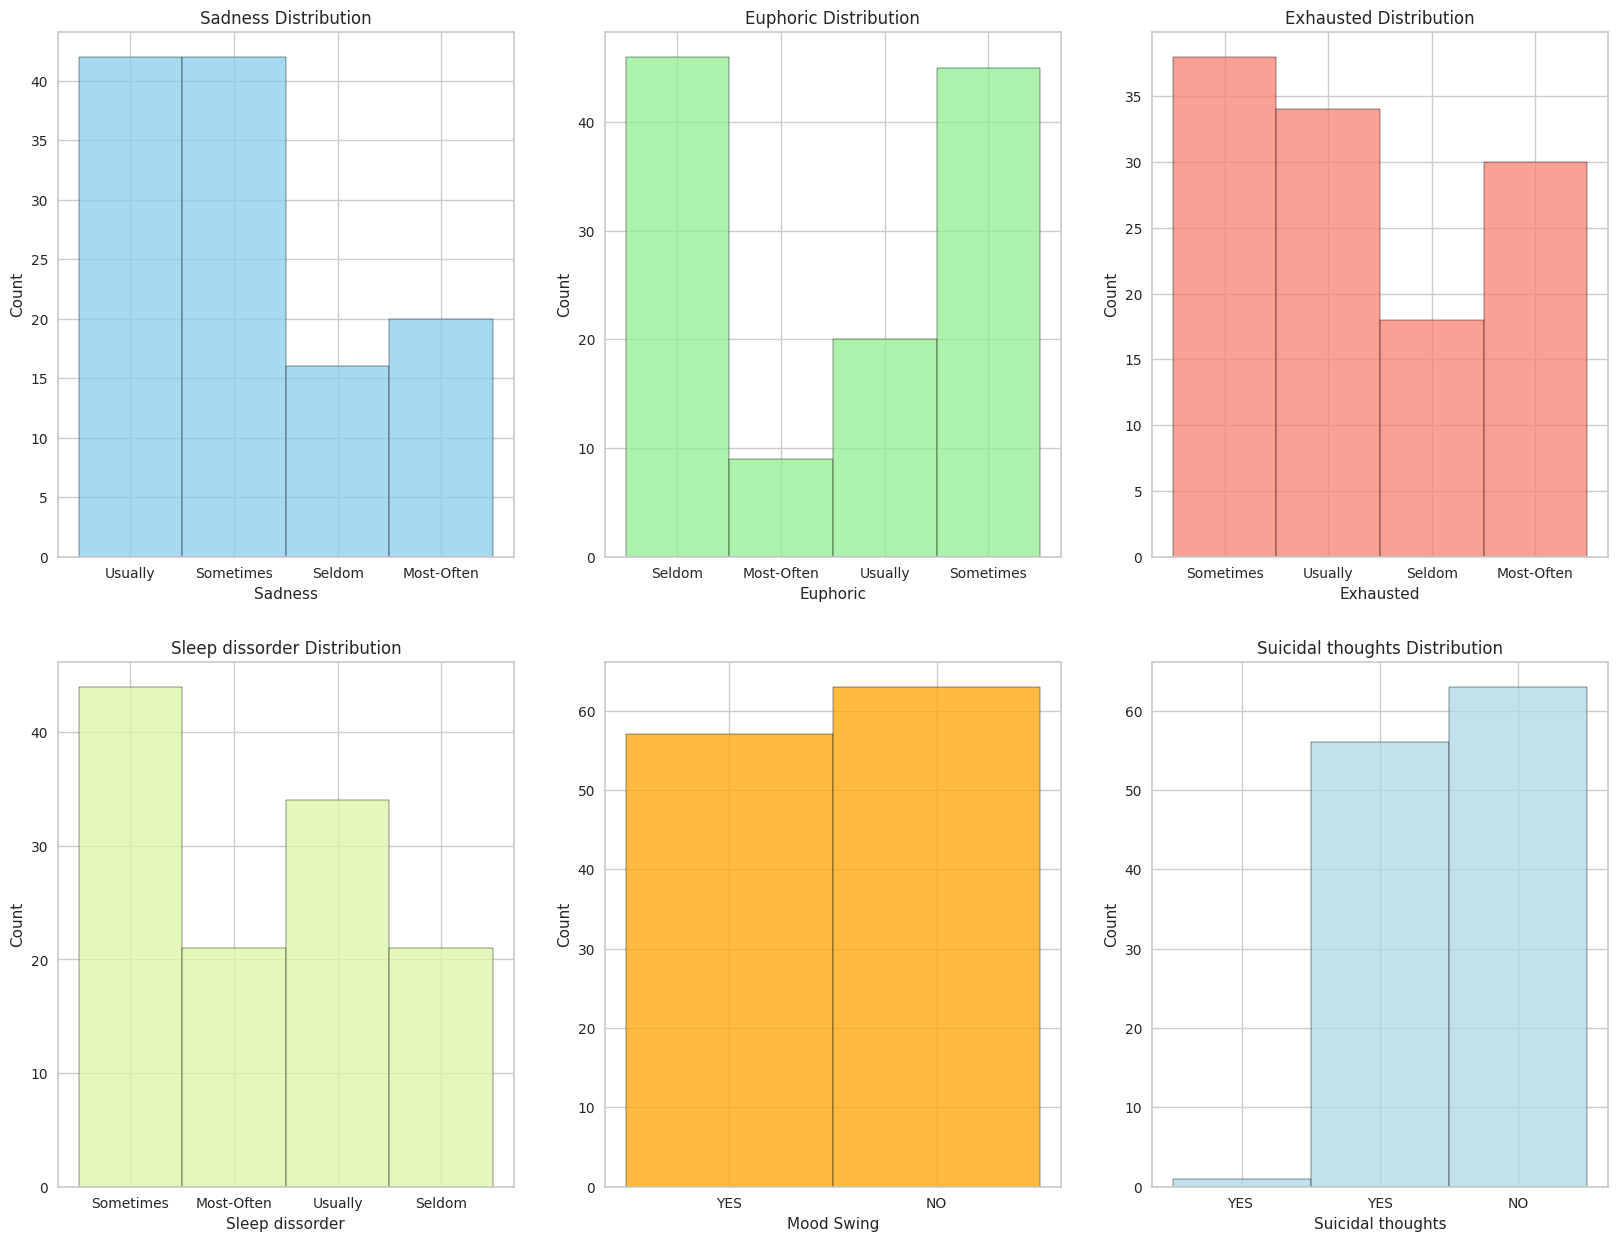

In [181]:
# Creating the subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 15))  # 1 row, 3 columns

# Plotting each emotion
sns.histplot(df['Sadness'], bins=20, kde=False, ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Sadness Distribution')

sns.histplot(df['Euphoric'], bins=20, kde=False, ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Euphoric Distribution')

sns.histplot(df['Exhausted'], bins=20, kde=False, ax=axes[0,2], color='salmon')
axes[0,2].set_title('Exhausted Distribution')

sns.histplot(df['Sleep dissorder'], bins=20, kde=False, ax=axes[1,0], color='#DAF7A6')
axes[1,0].set_title('Sleep dissorder Distribution')

sns.histplot(df['Mood Swing'], bins=20, kde=False, ax=axes[1,1], color='orange')
axes[1,2].set_title('Mood Swing Distribution')

sns.histplot(df['Suicidal thoughts'], bins=20, kde=False, ax=axes[1,2], color='lightblue')
axes[1,2].set_title('Suicidal thoughts Distribution')


In [182]:
colors_anorexia = ['skyblue', 'lightgreen']
colors_aggressive = ['salmon', 'orange']
colors_breakdown = ['purple', 'gold']
colors_admit = ['lightcoral', 'lightskyblue']

Text(0.5, 1.0, 'Distribution of Admit Mistakes')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

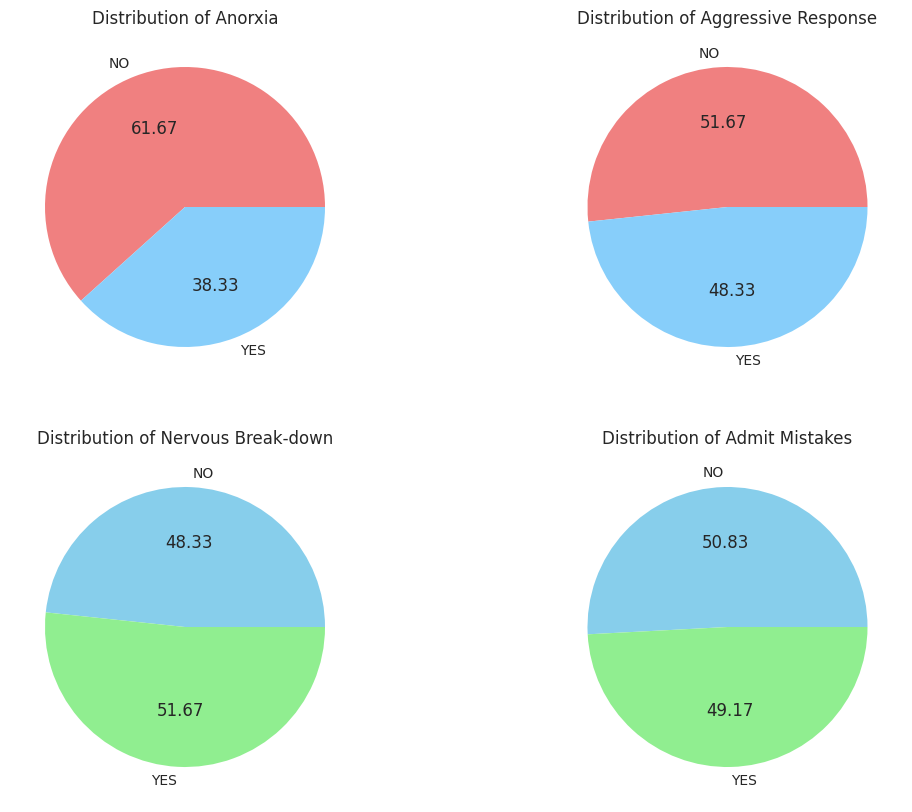

In [183]:


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
plt.subplots_adjust(wspace=0.4)

df.groupby('Anorxia').size().plot(kind='pie', autopct='%.2f', ax=axes[0, 0],colors = colors_admit)
axes[0, 0].set_title('Distribution of Anorxia')

df.groupby('Aggressive Response').size().plot(kind='pie', autopct='%.2f', ax=axes[0, 1],colors = colors_admit)
axes[0, 1].set_title('Distribution of Aggressive Response')

df.groupby('Nervous Break-down').size().plot(kind='pie', autopct='%.2f', ax=axes[1, 0],colors = colors_anorexia)
axes[1, 0].set_title('Distribution of Nervous Break-down')

df.groupby('Admit Mistakes').size().plot(kind='pie', autopct='%.2f', ax=axes[1, 1],colors = colors_anorexia)
axes[1, 1].set_title('Distribution of Admit Mistakes')

In [184]:
# sns.kdeplot(data=df, fill=True, common_norm=False, alpha=0.5)
# plt.xlabel('Scale of 10')
# plt.ylabel('Density')
# plt.title('Density Plot of Sexual Activity, Concentration, and Optimism')
# plt.legend(labels=['Sexual Activity', 'Concentration', 'Optimism'])
# plt.show()

In [185]:
# fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# cols = ['Sexual Activity (scale of 10)','Concentration (scale of 10)','Optimisim (scale of 10)']
# # Create density plots for each variable
# for i, column in enumerate(cols):
#     sns.kdeplot(data=df[column], fill=True, common_norm=False, alpha=0.5, ax=axes[i])
#     axes[i].set_title(f'Density Plot of {column}')
#     axes[i].set_xlabel('Scale of 10')
#     axes[i].set_ylabel('Density')

# plt.tight_layout()
# plt.show()

##### This graph represents the density of different of categories, the density of its peak     

<Axes: title={'center': 'Distribution of Diagnosis'}>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

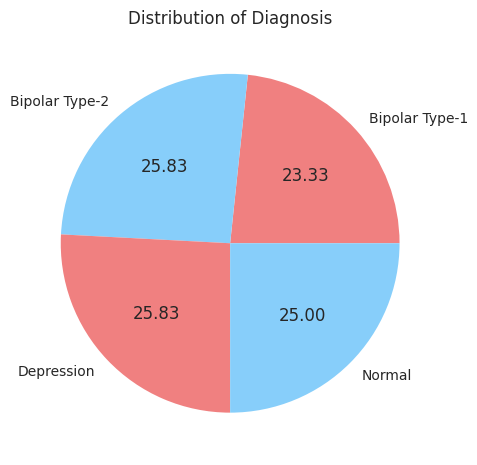

In [186]:
plt.title("Distribution of Diagnosis")
df.groupby('Expert Diagnose').size().plot(kind='pie', autopct='%.2f',colors = colors_admit)


##### Counts of different diagnose

In [187]:
df['Suicidal thoughts'] = df['Suicidal thoughts'].str.replace(' ', '')
distinct_counts = df['Suicidal thoughts'].value_counts()
print(distinct_counts)

Suicidal thoughts
NO     63
YES    57
Name: count, dtype: int64


In [188]:
for col in df.columns:
    print(col)

Sadness
Euphoric
Exhausted
Sleep dissorder
Mood Swing
Suicidal thoughts
Anorxia
Authority Respect
Try-Explanation
Aggressive Response
Ignore & Move-On
Nervous Break-down
Admit Mistakes
Overthinking
Sexual Activity (scale of 10)
Concentration (scale of 10)
Optimisim (scale of 10)
Expert Diagnose


##### (B) Bivariate analysis

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

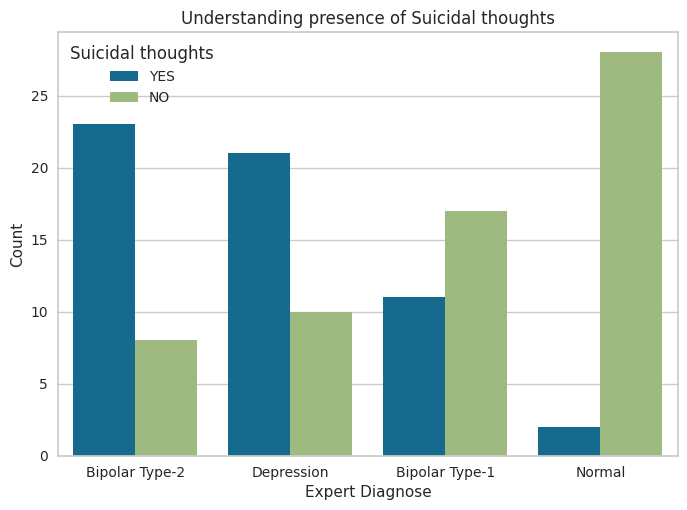

In [189]:
sns.countplot(x='Expert Diagnose', hue='Suicidal thoughts', data=df)
plt.title('Understanding presence of Suicidal thoughts')
plt.xlabel('Expert Diagnose')
plt.ylabel('Count')
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

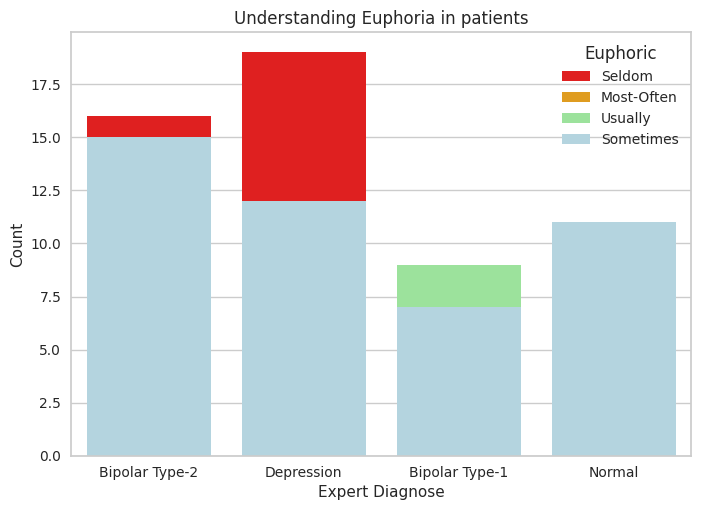

In [190]:
custom_palette = {'Sometimes': 'lightblue', 'Usually': 'lightgreen', 'Seldom': 'red','Most-Often':'orange'}
sns.countplot(x='Expert Diagnose', hue='Euphoric', data=df,dodge=False,palette=custom_palette)
plt.title('Understanding Euphoria in patients')
plt.xlabel('Expert Diagnose')
plt.ylabel('Count')
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

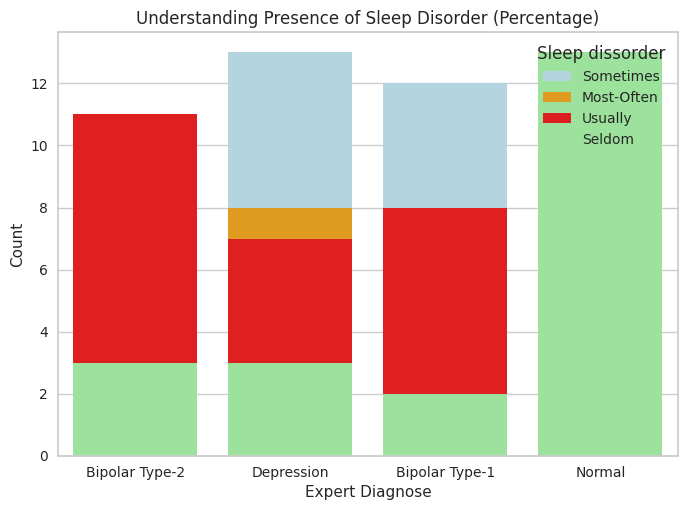

In [191]:
custom_palette_1 = {'Sometimes': 'lightblue', 'Usually': 'red', 'Seldom': 'lightgreen','Most-Often':'orange'}
ax = sns.countplot(x='Expert Diagnose', hue='Sleep dissorder', data=df, dodge=False,palette=custom_palette_1)
plt.title('Understanding Presence of Sleep Disorder (Percentage)')
plt.xlabel('Expert Diagnose')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_1265/1315162904.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(x='Sexual Activity (scale of 10)', y='Expert Diagnose', data=df, hue='Expert Diagnose',
/tmp/ipykernel_1265/1315162904.py:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.5}` instead.

  sns.pointplot(x='Sexual Activity (scale of 10)', y='Expert Diagnose', data=df, hue='Expert Diagnose',
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, 

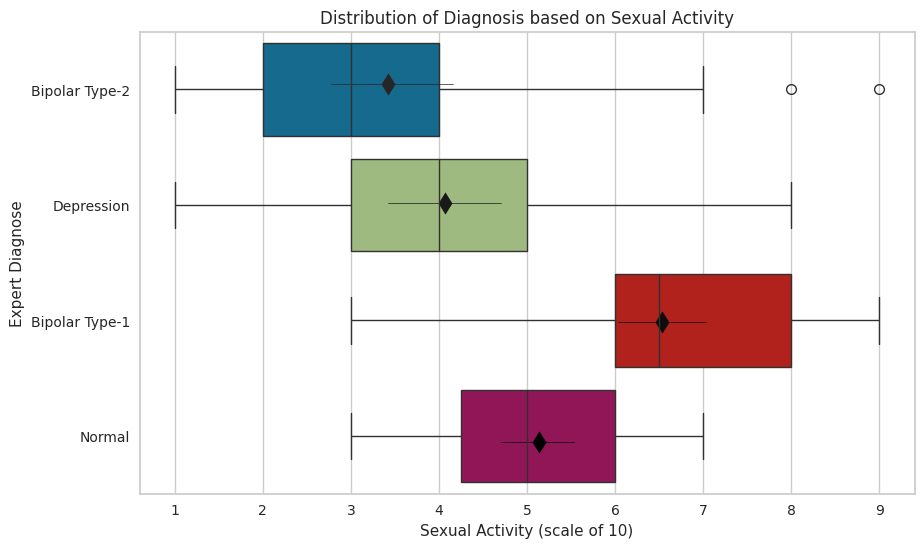

In [192]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sexual Activity (scale of 10)', y='Expert Diagnose', hue='Expert Diagnose', data=df)

# Add mean points to the plot
sns.pointplot(x='Sexual Activity (scale of 10)', y='Expert Diagnose', data=df, hue='Expert Diagnose',
              dodge=True, markers='d', errwidth=0.5, color="black")

plt.title('Distribution of Diagnosis based on Sexual Activity')
plt.show()


/tmp/ipykernel_1265/1546113331.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:Black'` for the same effect.

  sns.pointplot(x='Concentration (scale of 10)', y='Expert Diagnose', data=df, hue='Expert Diagnose',
/tmp/ipykernel_1265/1546113331.py:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.5}` instead.

  sns.pointplot(x='Concentration (scale of 10)', y='Expert Diagnose', data=df, hue='Expert Diagnose',
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bits

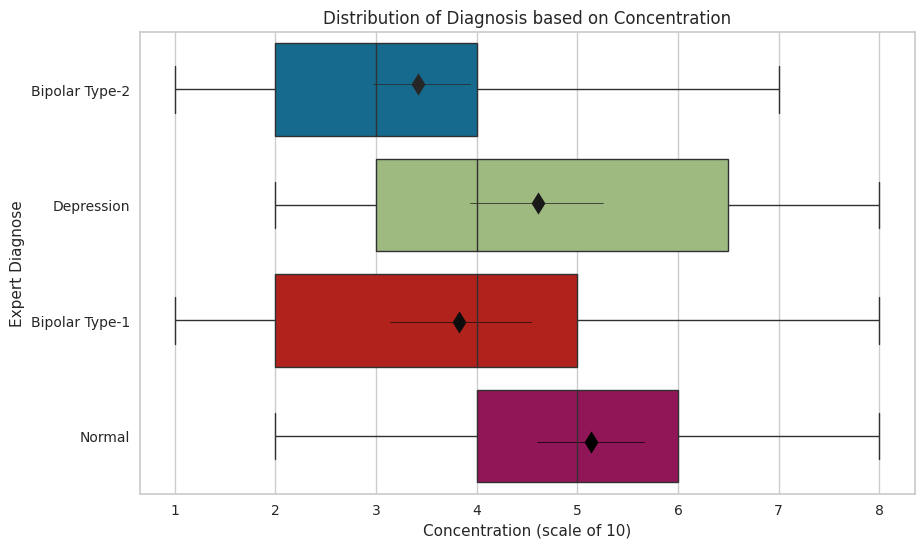

In [193]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Concentration (scale of 10)', y='Expert Diagnose', hue='Expert Diagnose', data=df)

# Add mean points to the plot
sns.pointplot(x='Concentration (scale of 10)', y='Expert Diagnose', data=df, hue='Expert Diagnose',
              dodge=True, markers='d', linestyles='', errwidth=0.5,color="Black")

plt.title('Distribution of Diagnosis based on Concentration')
plt.show()


### Feature Engineering

##### (A) Dealing with Missing Values

In [194]:
df.sample(5)

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity (scale of 10),Concentration (scale of 10),Optimisim (scale of 10),Expert Diagnose
62,Usually,Seldom,Sometimes,Usually,YES,NO,YES,NO,NO,YES,NO,NO,NO,NO,7.0,4.0,6.0,Bipolar Type-1
30,Sometimes,Most-Often,Sometimes,Sometimes,YES,YES,NO,YES,YES,YES,NO,YES,NO,NO,3.0,2.0,6.0,Bipolar Type-1
72,Sometimes,Seldom,Most-Often,Sometimes,YES,NO,NO,NO,NO,YES,NO,YES,NO,NO,7.0,5.0,7.0,Bipolar Type-1
48,Seldom,Usually,Usually,Usually,YES,YES,NO,NO,NO,NO,NO,YES,NO,NO,5.0,4.0,6.0,Bipolar Type-1
27,Usually,Seldom,Usually,Usually,NO,NO,NO,NO,YES,NO,YES,YES,NO,YES,5.0,2.0,4.0,Depression


In [195]:
df.isnull().sum()

Sadness                          0
Euphoric                         0
Exhausted                        0
Sleep dissorder                  0
Mood Swing                       0
Suicidal thoughts                0
Anorxia                          0
Authority Respect                0
Try-Explanation                  0
Aggressive Response              0
Ignore & Move-On                 0
Nervous Break-down               0
Admit Mistakes                   0
Overthinking                     0
Sexual Activity (scale of 10)    0
Concentration (scale of 10)      0
Optimisim (scale of 10)          0
Expert Diagnose                  0
dtype: int64

##### Splitting the Dataset


In [235]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Expert Diagnose']),df['Expert Diagnose'],test_size =0.2,random_state=42)

In [236]:
# label_encoder = LabelEncoder()
# # Fit and transform the target variable for training set
# y_train = label_encoder.fit_transform(y_train)


#### (B) Measuring Categorical Values

In [237]:
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Loop through each categorical column and display unique value counts
for column in categorical_columns:
    unique_values_count = X_train[column].value_counts()
    print(f"Unique values count for {column}:\n{unique_values_count}\n")


Unique values count for Sadness:
Sadness
Usually       35
Sometimes     34
Most-Often    14
Seldom        13
Name: count, dtype: int64

Unique values count for Euphoric:
Euphoric
Seldom        36
Sometimes     35
Usually       17
Most-Often     8
Name: count, dtype: int64

Unique values count for Exhausted:
Exhausted
Sometimes     31
Usually       26
Most-Often    24
Seldom        15
Name: count, dtype: int64

Unique values count for Sleep dissorder:
Sleep dissorder
Sometimes     33
Usually       27
Seldom        18
Most-Often    18
Name: count, dtype: int64

Unique values count for Mood Swing:
Mood Swing
YES    49
NO     47
Name: count, dtype: int64

Unique values count for Suicidal thoughts:
Suicidal thoughts
NO     52
YES    44
Name: count, dtype: int64

Unique values count for Anorxia:
Anorxia
NO     60
YES    36
Name: count, dtype: int64

Unique values count for Authority Respect:
Authority Respect
NO     56
YES    40
Name: count, dtype: int64

Unique values count for Try-Explanat

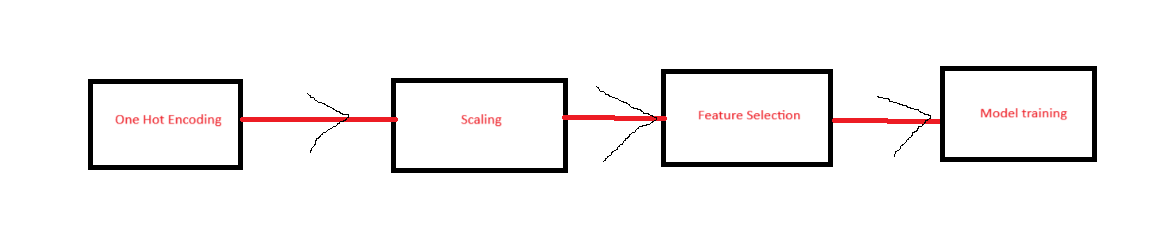

#### Creating pipelines

In [238]:
#onehotencoding
trf1 = ColumnTransformer(transformers=[
    ('mood_encoder',OneHotEncoder(sparse_output=False),['Sadness','Euphoric','Exhausted','Sleep dissorder','Mood Swing','Suicidal thoughts','Anorxia','Authority Respect','Try-Explanation','Aggressive Response','Ignore & Move-On','Nervous Break-down','Admit Mistakes','Overthinking'])

],
                         remainder='passthrough')


#### To find the shape
trf = ColumnTransformer(transformers=[
    ('mood_encoder',OneHotEncoder(sparse_output=False),['Sadness','Euphoric','Exhausted','Sleep dissorder','Mood Swing','Suicidal thoughts','Anorxia','Authority Respect','Try-Explanation','Aggressive Response','Ignore & Move-On','Nervous Break-down','Admit Mistakes','Overthinking'])

],
                         remainder='passthrough')


trf.fit_transform(X_train).shape

In [239]:
#scaling
trf2 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,39))
])

##### Feature Selection

A) CHI SQUARE

In [240]:
trf3 = SelectKBest(score_func=chi2,k=8)

In [241]:
# #train the model
# trf4 = DecisionTreeClassifier()
# pipe = Pipeline([
#     ('trf1',trf1),
#     ('trf2',trf2),
#     ('trf3',trf3),
#     ('classifier', trf4)

# ])
# pipe.fit(X_train,y_train)

#### Creating pipeline

In [247]:
classifiers = {
    "Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
}

for name, classifier in classifiers.items():
    # Create a pipeline with the current classifier
    pipe = Pipeline([
        ('trf1', trf1),
        ('trf2', trf2),
        ('trf3', trf3),
        ('classifier', classifier)
    ])
    pipe.fit(X_train, y_train)

In [250]:
from pprint import pprint

for name, classifier in classifiers.items():
    # Set the classifier in the pipeline
    pipe.set_params(classifier=classifier)
    
    # Fit and evaluate
    pipe.fit(X_train, y_train)
    
    # Print the named_steps in a formatted way
    print(f"{name} Pipeline Steps:")
    pprint(pipe.named_steps)

    # Predict and evaluate
    y_pred = pipe.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}\n")


Nearest Neighbors Pipeline Steps:
{'classifier': KNeighborsClassifier(),
 'trf1': ColumnTransformer(remainder='passthrough',
                  transformers=[('mood_encoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['Sadness', 'Euphoric', 'Exhausted',
                                  'Sleep dissorder', 'Mood Swing',
                                  'Suicidal thoughts', 'Anorxia',
                                  'Authority Respect', 'Try-Explanation',
                                  'Aggressive Response', 'Ignore & Move-On',
                                  'Nervous Break-down', 'Admit Mistakes',
                                  'Overthinking'])]),
 'trf2': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 39, None))]),
 'trf3': SelectKBest(k=8, score_func=<function chi2 at 0x7f4d3683d8a0>)}
Nearest Neighbors Accuracy: 0.8333333333333334

Random Forest Pipeline Steps:
{'classifier': RandomForestClassif

#### Confusion Matrix

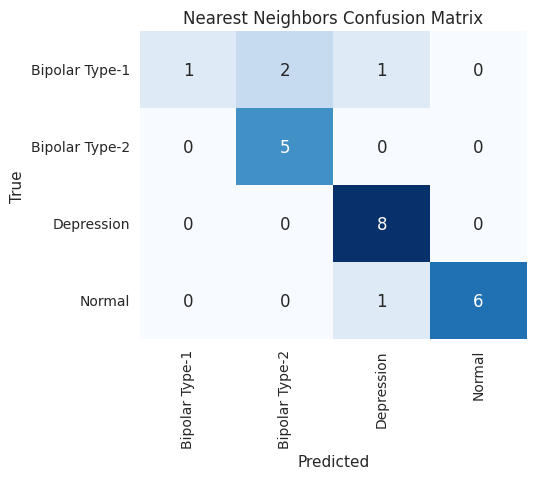

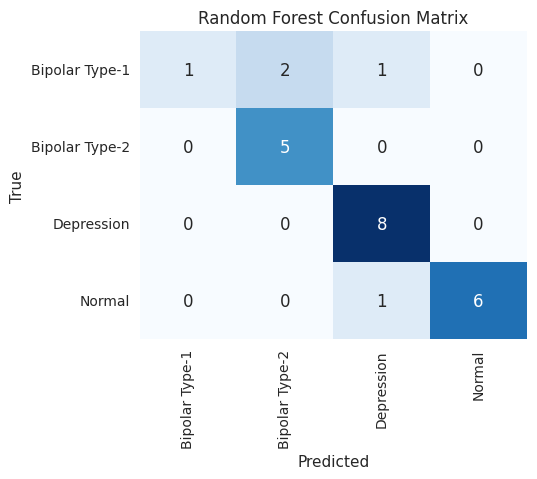

In [252]:
from sklearn.metrics import confusion_matrix

plt.rcParams['font.sans-serif'] = 'DejaVu Sans'
for name, classifier in classifiers.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=pipe.classes_, yticklabels=pipe.classes_)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()